<a href="https://colab.research.google.com/github/2303A52328/Explainable_AI/blob/main/stress_level_dataset_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in dataset:
 Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

Missing values:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship   

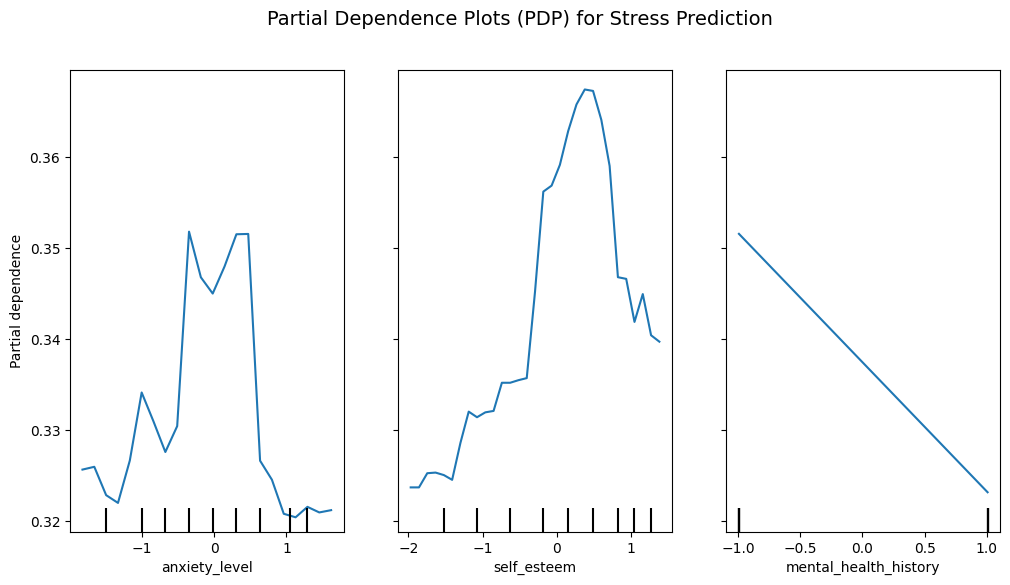

In [5]:
# ==============================
# Partial Dependence Plot (PDP)
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

# --- Load Dataset ---
df = pd.read_csv("/content/StressLevelDataset.csv")

print("Columns in dataset:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# --- Identify features and target ---
# ⚠️ Change 'Stress_Level' to your actual target column name
target_col = 'stress_level'  # <-- CHANGE THIS if your target column name is different
X = df.drop(columns=[target_col])
y = df[target_col]

# --- Encode categorical variables ---
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardize numeric features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Train model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Model accuracy ---
print(f"\nModel Accuracy: {model.score(X_test, y_test)*100:.2f}%")

# --- PDP for selected features ---
# Select top 3 features (you can modify this list)
features_to_plot = list(df.drop(columns=[target_col]).columns[:3])

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features_to_plot,
    kind='average',
    ax=ax,
    feature_names=X.columns.tolist(), # Add feature names
    target=1  # Specify the target class for multi-class problems
)
plt.suptitle("Partial Dependence Plots (PDP) for Stress Prediction", fontsize=14)
plt.show()

In [12]:
# =============================================
# LIME EXPLANATION FOR STRESS DATASET
# =============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import lime
from lime import lime_tabular

# --- Load Dataset ---
df = pd.read_csv("/content/StressLevelDataset.csv")

# ⚠️ Change this if your target column has a different name
target_col = 'stress_level'

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found! Check your dataset column names.")

# --- Split features and target ---
X = df.drop(columns=[target_col])
y = df[target_col]

# --- Encode categorical data ---
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))

# --- Handle missing values ---
X = X.fillna(X.mean(numeric_only=True))

# --- Split and scale data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Train model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(f"✅ Model Accuracy: {model.score(X_test, y_test)*100:.2f}%")

# --- Initialize LIME Explainer ---
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=list(df.drop(columns=[target_col]).columns),
    class_names=np.unique(y).astype(str),
    mode='classification'
)

# --- Explain a single instance ---
i = 0  # Change index to test different samples
exp = explainer.explain_instance(X_test[i], model.predict_proba)

# --- Show result ---
exp.show_in_notebook(show_table=True)
# If you are not using a notebook:
# exp.save_to_file('lime_explanation.html')
# print("LIME explanation saved as lime_explanation.html")

✅ Model Accuracy: 87.27%


In [9]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d6a2352d41af8ef6c452c89c7878ebc1fb182523bb7a0899094adec911c79cf4
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [34]:
!pip install shap --quiet

Dataset loaded successfully.


/tmp/ipython-input-4184048545.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


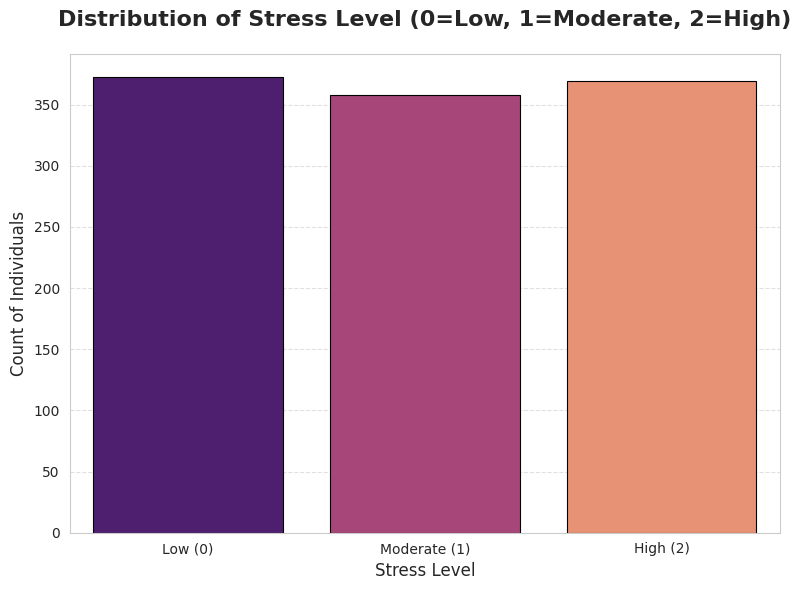

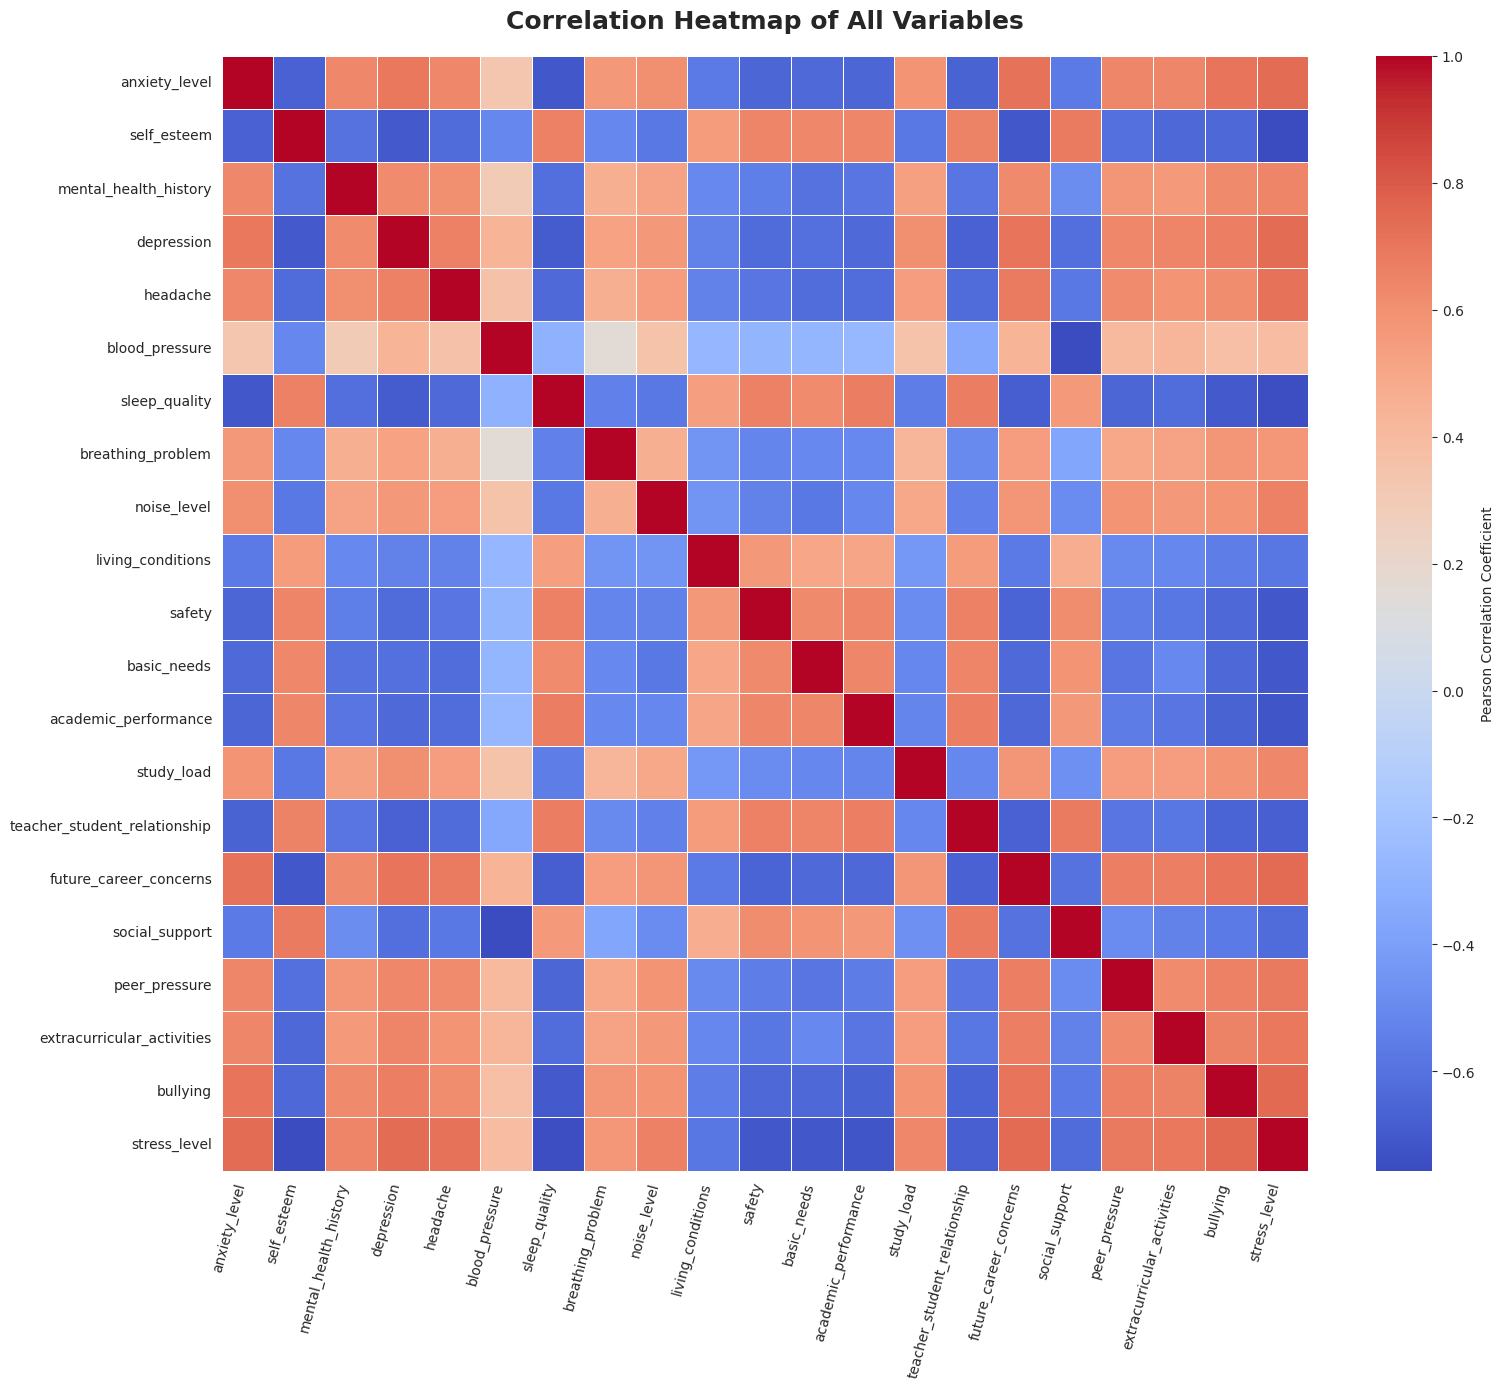

/tmp/ipython-input-4184048545.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


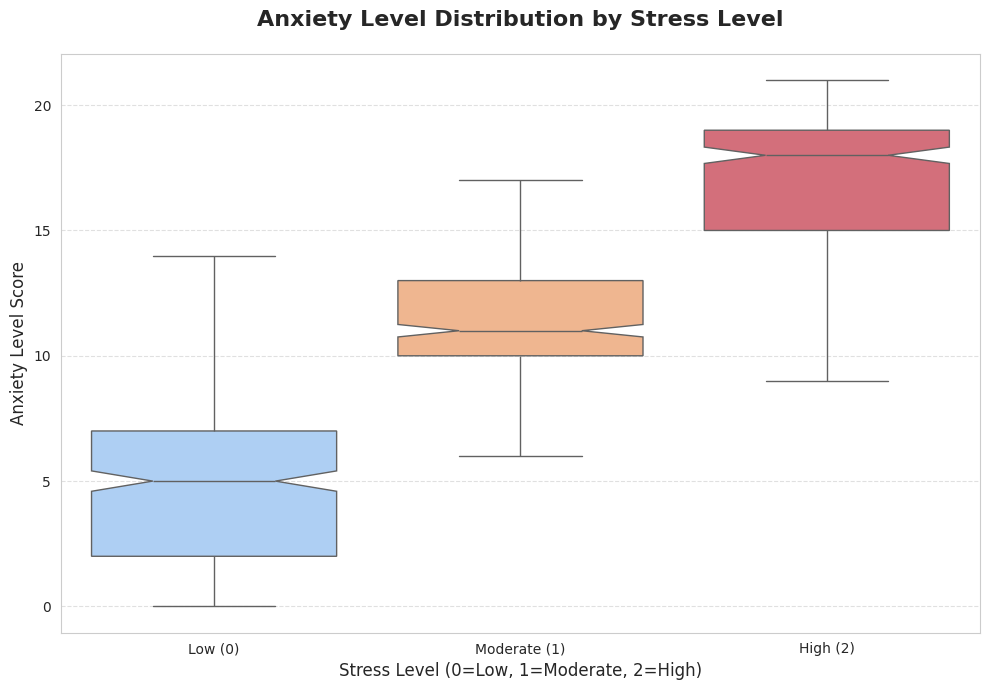

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup for Google Colab or Local Environment ---
# NOTE: This code assumes 'StressLevelDataset.csv' is uploaded to the Colab environment
# or is in the current working directory.

try:
    # Load the dataset
    df = pd.read_csv("/content/StressLevelDataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StressLevelDataset.csv' not found. Please ensure the file is uploaded to the Colab environment.")
    exit()

# Set a professional style for the plots
sns.set_style("whitegrid")

# Define the colors for visual consistency
colors = sns.color_palette("magma", 3)

# =================================================================
# 1. Distribution of the Target Variable (stress_level)
# =================================================================

plt.figure(figsize=(8, 6))
# Create a count plot for the target variable
sns.countplot(
    x='stress_level',
    data=df,
    palette=colors,
    order=sorted(df['stress_level'].unique()),
    edgecolor='black',
    linewidth=0.8
)

# Customize the plot
plt.title(
    'Distribution of Stress Level (0=Low, 1=Moderate, 2=High)',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)
plt.xticks([0, 1, 2], ['Low (0)', 'Moderate (1)', 'High (2)'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the first plot

# =================================================================
# 2. Correlation Heatmap
# =================================================================

plt.figure(figsize=(16, 14)) # Slightly larger for better visibility of 21 variables
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=False, # Set to False to keep the plot clean; annotations clutter the plot with 21 variables
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)

# Customize the plot
plt.title(
    'Correlation Heatmap of All Variables',
    fontsize=18,
    fontweight='bold',
    pad=20
)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show() # Display the second plot

# =================================================================
# 3. Relationship between Anxiety Level and Stress Level (Box Plot)
# =================================================================

plt.figure(figsize=(10, 7))
# Create a box plot to show distribution of a continuous variable across categories
sns.boxplot(
    x='stress_level',
    y='anxiety_level',
    data=df,
    palette=['#a2cffe', '#ffb380', '#e35f6e'], # Custom colors for distinction
    showfliers=False, # Hide outliers for a cleaner look
    notch=True
)

# Customize the plot
plt.title(
    'Anxiety Level Distribution by Stress Level',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Stress Level (0=Low, 1=Moderate, 2=High)', fontsize=12)
plt.ylabel('Anxiety Level Score', fontsize=12)
plt.xticks([0, 1, 2], ['Low (0)', 'Moderate (1)', 'High (2)'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the third plot


Dataset loaded successfully.
Model Training Accuracy: 0.8667

Generating ICE Plot for feature: 'anxiety_level' and target class: 2


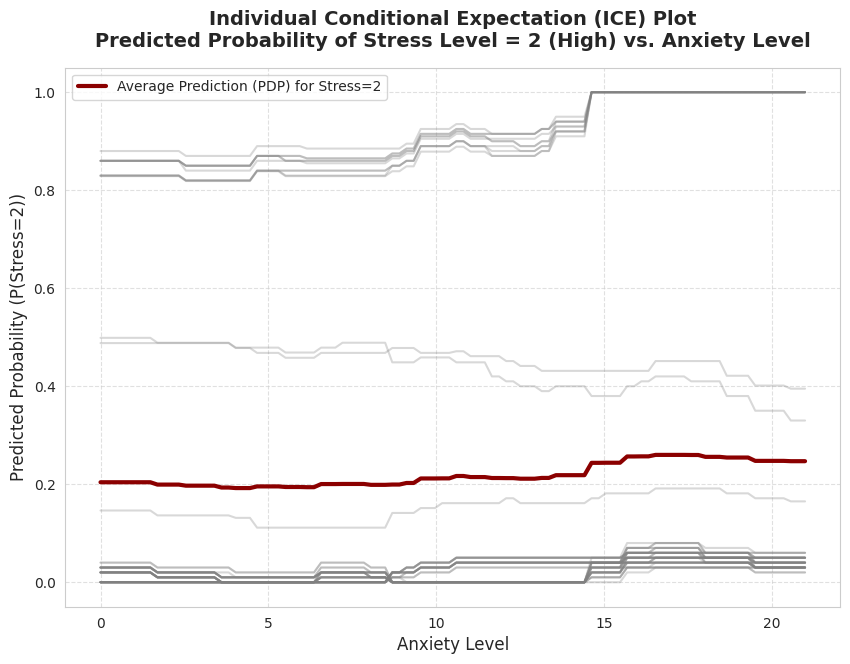


ICE plot generation complete.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Configuration ---
# Feature to analyze with the ICE plot
FEATURE_TO_PLOT = 'anxiety_level'
# Target class probability to track (0=Low, 1=Moderate, 2=High Stress)
TARGET_CLASS = 2
# Number of individual instances (lines) to plot
NUM_INSTANCES_TO_PLOT = 50

# --- Setup for Google Colab or Local Environment ---
try:
    # Load the dataset
    df = pd.read_csv("/content/StressLevelDataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StressLevelDataset.csv' not found. Please ensure the file is uploaded to the Colab environment.")
    exit()

# 1. Prepare Data and Train a Model
# Define features (X) and target (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split data (optional, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

# Check model performance (optional, but confirms the model is learning)
y_pred = model.predict(X_test)
print(f"Model Training Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# 2. Individual Conditional Expectation (ICE) Plot Generation
def generate_ice_plot(model, X_data, feature_name, target_class, n_samples):
    """
    Generates ICE plots showing the predicted probability for the target class
    as the chosen feature varies for individual instances.
    """

    # 2.1 Select a subset of instances to plot
    # We sample instances from the original dataset
    sample_indices = np.random.choice(X_data.index, size=n_samples, replace=False)
    X_sample = X_data.loc[sample_indices].copy()

    # 2.2 Define the feature range for perturbation
    # We will vary the feature across its entire observed range in the dataset
    feature_values = np.linspace(X_data[feature_name].min(), X_data[feature_name].max(), 100)

    # 2.3 Prepare the plot
    plt.figure(figsize=(10, 7))
    plt.title(
        f'Individual Conditional Expectation (ICE) Plot\n'
        f'Predicted Probability of Stress Level = {target_class} ({("Low", "Moderate", "High")[target_class]}) vs. {feature_name.replace("_", " ").title()}',
        fontsize=14,
        fontweight='bold',
        pad=15
    )
    plt.xlabel(feature_name.replace("_", " ").title(), fontsize=12)
    plt.ylabel(f'Predicted Probability (P(Stress={target_class}))', fontsize=12)

    # 2.4 Perturb and Predict for each instance
    all_predictions = []

    # Iterate through each sampled instance
    for i, original_row in X_sample.iterrows():
        # Create a DataFrame of 100 perturbed copies of the current instance
        perturbed_data = pd.DataFrame([original_row] * len(feature_values), columns=X_data.columns)

        # Systematically replace the value of the feature being analyzed
        perturbed_data[feature_name] = feature_values

        # Get predictions (probabilities) from the trained model
        # model.predict_proba returns probabilities for all classes (e.g., [P(0), P(1), P(2)])
        probabilities = model.predict_proba(perturbed_data)

        # Extract the probability for the specified target class
        class_predictions = probabilities[:, target_class]
        all_predictions.append(class_predictions)

        # Plot the individual curve (faded for individual lines)
        plt.plot(feature_values, class_predictions, color='grey', alpha=0.3)

    # 2.5 Plot the average (Partial Dependence Plot - PDP)
    # The average of all ICE lines gives the PDP
    avg_predictions = np.mean(all_predictions, axis=0)
    plt.plot(
        feature_values,
        avg_predictions,
        color='darkred',
        linewidth=3,
        label=f'Average Prediction (PDP) for Stress={target_class}'
    )

    plt.legend()
    plt.grid(axis='both', linestyle='--', alpha=0.6)
    plt.show()

# 3. Execute the ICE Plot Generation
print(f"\nGenerating ICE Plot for feature: '{FEATURE_TO_PLOT}' and target class: {TARGET_CLASS}")
generate_ice_plot(
    model=model,
    X_data=X,
    feature_name=FEATURE_TO_PLOT,
    target_class=TARGET_CLASS,
    n_samples=NUM_INSTANCES_TO_PLOT
)

print("\nICE plot generation complete.")


Dataset loaded successfully.

Model Accuracy on Full Dataset: 0.9000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


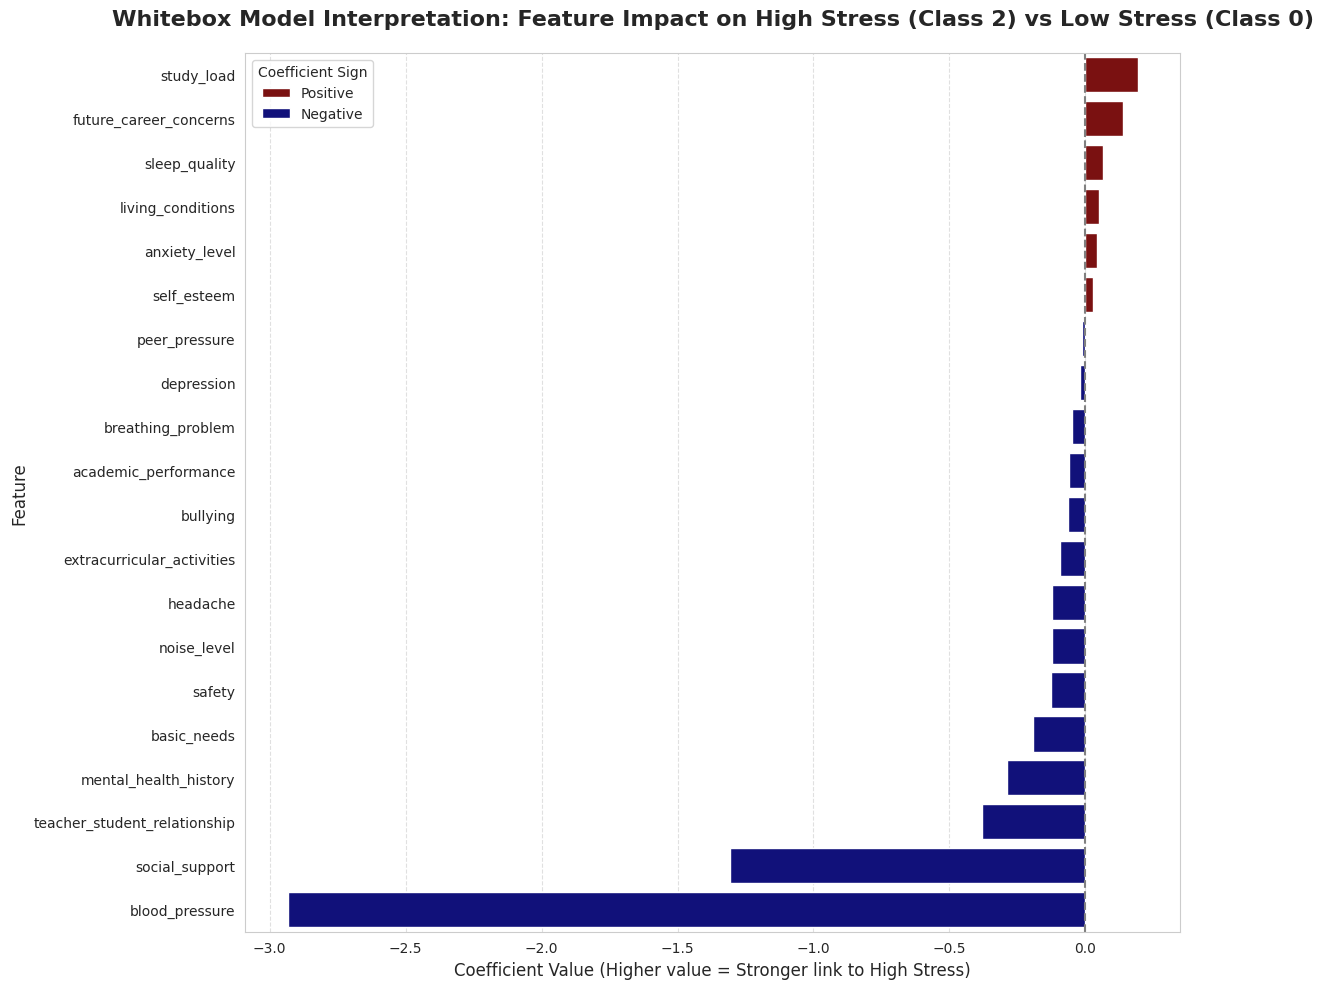


--- Top 5 Features Most Strongly Linked to HIGH Stress (Positive Coefficient) ---
| Feature                | Coefficient (High Stress vs Low Stress)   | Coefficient Sign   |
|:-----------------------|:------------------------------------------|:-------------------|
| study_load             | 0.191845                                  | Positive           |
| future_career_concerns | 0.137229                                  | Positive           |
| sleep_quality          | 0.0663862                                 | Positive           |
| living_conditions      | 0.051805                                  | Positive           |
| anxiety_level          | 0.0415771                                 | Positive           |

--- Top 5 Features Most Strongly Linked to LOW Stress (Negative Coefficient) ---
| Feature                      | Coefficient (High Stress vs Low Stress)   | Coefficient Sign   |
|:-----------------------------|:------------------------------------------|:----------------

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Target class for comparison (Stress Level 2 - High Stress)
TARGET_CLASS_INDEX = 2
# Base class for comparison in multinomial regression (Stress Level 0 - Low Stress)
BASE_CLASS_INDEX = 0

# --- Setup for Google Colab or Local Environment ---
try:
    # Load the dataset
    df = pd.read_csv("/content/StressLevelDataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StressLevelDataset.csv' not found. Please ensure the file is uploaded to the Colab environment.")
    exit()

# 1. Prepare Data
X = df.drop('stress_level', axis=1)
y = df['stress_level']
feature_names = X.columns

# 2. Scale Data
# Scaling is crucial for Logistic Regression to ensure all features contribute fairly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train the Whitebox Model (Multinomial Logistic Regression)
# 'multinomial' solver is used for multi-class classification (stress levels 0, 1, 2)
# 'lbfgs' is a common solver for this type of problem
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_scaled, y)

print(f"\nModel Accuracy on Full Dataset: {model.score(X_scaled, y):.4f}")

# 4. Extract and Interpret Coefficients
# In a multinomial model, coefficients are generated for (N-1) classes, where N=3.
# The model internally treats one class (usually the lowest index, 0) as the reference.
# model.coef_ is an array where each row corresponds to a class's coefficients (Class 1, Class 2).

# Find the index of the high stress class (TARGET_CLASS_INDEX) within the model's coefficient matrix.
# If TARGET_CLASS_INDEX is 2 (High Stress), it's the second row of model.coef_ (index 1),
# because index 0 is the reference class.
if TARGET_CLASS_INDEX > BASE_CLASS_INDEX:
    coef_row_index = TARGET_CLASS_INDEX - 1
else:
    # Handle the case where the user might change the base/target class.
    print(f"Warning: Cannot interpret coefficients for TARGET_CLASS_INDEX={TARGET_CLASS_INDEX} vs BASE_CLASS_INDEX={BASE_CLASS_INDEX}. Defaulting to Class 2 vs Class 0.")
    coef_row_index = 1 # Assuming Class 2 vs Class 0 comparison


# Extract the coefficients for the target class (High Stress, Class 2)
high_stress_coefs = model.coef_[coef_row_index]

# Create a DataFrame for easy interpretation and sorting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (High Stress vs Low Stress)': high_stress_coefs
})

# Add a column to indicate the sign of the coefficient for coloring
coef_df['Coefficient Sign'] = coef_df['Coefficient (High Stress vs Low Stress)'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


coef_df = coef_df.sort_values(by='Coefficient (High Stress vs Low Stress)', ascending=False)

# 5. Visualize the Feature Importance (Coefficients)
plt.figure(figsize=(12, 10))

# Create a list of colors based on the 'Coefficient Sign' column
bar_colors = coef_df['Coefficient Sign'].apply(lambda x: 'darkred' if x == 'Positive' else 'darkblue').tolist()

sns.barplot(
    x='Coefficient (High Stress vs Low Stress)',
    y='Feature',
    data=coef_df,
    palette=bar_colors, # Pass the list of colors directly
    # hue='Coefficient Sign', # Remove hue
    dodge=False # Keep dodge=False
)
plt.axvline(x=0, color='gray', linestyle='--')
plt.title(
    'Whitebox Model Interpretation: Feature Impact on High Stress (Class 2) vs Low Stress (Class 0)',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Coefficient Value (Higher value = Stronger link to High Stress)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6. Print Top and Bottom features for summary
print("\n--- Top 5 Features Most Strongly Linked to HIGH Stress (Positive Coefficient) ---")
print(coef_df[coef_df['Coefficient Sign'] == 'Positive'].head(5).to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Top 5 Features Most Strongly Linked to LOW Stress (Negative Coefficient) ---")
print(coef_df[coef_df['Coefficient Sign'] == 'Negative'].tail(5).to_markdown(index=False, numalign="left", stralign="left"))

Dataset loaded successfully.

Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:32:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Training Complete.

--- Model Evaluation ---
Test Accuracy: 0.8758

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       112
           1       0.87      0.87      0.87       107
           2       0.87      0.91      0.89       111

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330


Generating Feature Importance Plot...


/tmp/ipython-input-2410222268.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


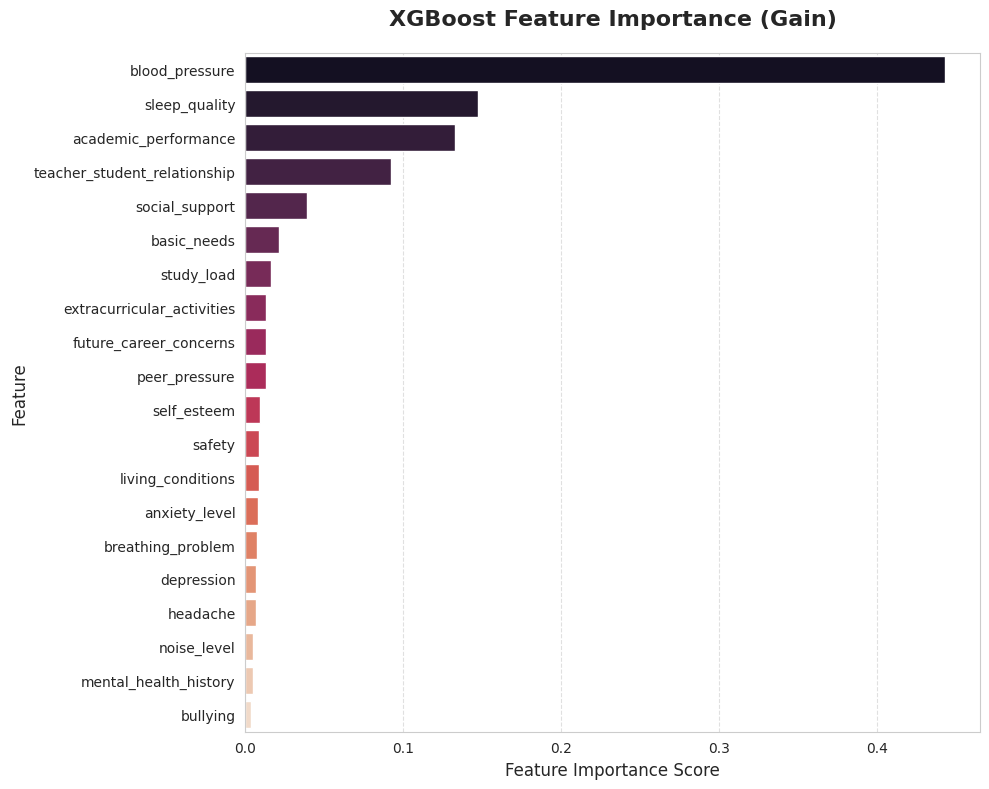


Feature Importance plot generated successfully.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# --- Configuration ---
RANDOM_STATE = 42
TEST_SIZE = 0.3

# --- Setup for Google Colab or Local Environment ---
try:
    # Load the dataset
    df = pd.read_csv("/content/StressLevelDataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StressLevelDataset.csv' not found. Please ensure the file is uploaded to the Colab environment.")
    exit()

# 1. Prepare Data
X = df.drop('stress_level', axis=1)
y = df['stress_level']
feature_names = X.columns

# 2. Split Data
# Stratify ensures equal representation of all stress levels in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# 3. Scale Data (Optional but good practice for gradient-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for feature importance labeling later (using feature names)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)


# 4. Train the XGBoost Model
print("\nTraining XGBoost Classifier...")

# Initialize XGBClassifier
# objective='multi:softmax' is used for multi-class classification
# num_class=3 corresponds to stress levels 0, 1, 2
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=150, # Number of boosting rounds (trees)
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=RANDOM_STATE
)

# Fit the model
xgb_model.fit(X_train_scaled_df, y_train)

print("XGBoost Model Training Complete.")

# 5. Evaluate the Model
y_pred = xgb_model.predict(X_test_scaled_df)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Evaluation ---")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# 6. Visualize Feature Importance
print("\nGenerating Feature Importance Plot...")

# Extract feature importances
importance_scores = xgb_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top features
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette=sns.color_palette("rocket", len(importance_df))
)

plt.title(
    'XGBoost Feature Importance (Gain)',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nFeature Importance plot generated successfully.")
